In [0]:
import os
# os.environ['CUDA_VISIBLE_DEVICES'] = ""

In [0]:
from NN import *
from utils import get_tf_session
from data_utils import make_batch, single_np_datapoint_generator

import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [0]:
train_dataset_files = [
 './data/tfrecords/0_cropped.tfrecord',
 './data/tfrecords/1_cropped.tfrecord',
 './data/tfrecords/2_cropped.tfrecord',
 './data/tfrecords/3_cropped.tfrecord',
 './data/tfrecords/4_cropped.tfrecord',
 './data/tfrecords/5_cropped.tfrecord',
 './data/tfrecords/6_cropped.tfrecord',
 './data/tfrecords/7_cropped.tfrecord',
 './data/tfrecords/8_cropped.tfrecord',
]

validation_dataset_files = ['./data/tfrecords/9_cropped.tfrecord']

In [6]:
X_batch, Y_batch = make_batch(train_dataset_files, 200, raw_values=True)
no_of_outputs = 1
age_dense = get_regression_NN(X_batch, 60, [lambda i: 10 + 3*i], 4, no_of_outputs)
loss = tf.losses.mean_squared_error(tf.cast(tf.reshape(Y_batch[:, 1],[-1,1]), tf.int32), age_dense)
train_op = get_training_op(loss)
X = tf.placeholder(dtype=tf.float32, shape=(None, None, None, 3))
age_pred = get_regression_NN(X, 60, [lambda i: 10 + 3*i], 4, no_of_outputs)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


In [7]:
sess = get_tf_session()
if tf.test.is_gpu_available():
    print("Tensorflow is able to detect gpu...")

Tensorflow is able to detect gpu...


In [8]:
avg_loss = 0
print_int = 200
st = time.time()
# while datetime.datetime.now().time() < datetime.time(hour=8, minute=30):
for i in range(5000):
    _, loss_value= sess.run([train_op, loss])
    avg_loss += loss_value
    if i>0 and i%print_int == 0:
        print("Batch No.", i, "Avg loss:", avg_loss/print_int)
        avg_loss = 0
print("training took total", time.time() - st, "seconds")

Batch No. 200 Avg loss: 331.8318941116333
Batch No. 400 Avg loss: 157.04911346435546
Batch No. 600 Avg loss: 154.50487873077392
Batch No. 800 Avg loss: 151.47941005706787
Batch No. 1000 Avg loss: 148.69893268585204
Batch No. 1200 Avg loss: 146.11204273223876
Batch No. 1400 Avg loss: 142.8570775604248
Batch No. 1600 Avg loss: 140.3071291732788
Batch No. 1800 Avg loss: 138.14426025390625
Batch No. 2000 Avg loss: 136.46332008361816
Batch No. 2200 Avg loss: 135.83071865081786
Batch No. 2400 Avg loss: 134.92899894714355
Batch No. 2600 Avg loss: 133.8459800720215
Batch No. 2800 Avg loss: 132.29557598114013
Batch No. 3000 Avg loss: 131.5482594680786
Batch No. 3200 Avg loss: 130.68667163848878
Batch No. 3400 Avg loss: 129.84105667114258
Batch No. 3600 Avg loss: 129.20860927581788
Batch No. 3800 Avg loss: 128.50024024963378
Batch No. 4000 Avg loss: 127.55597728729248
Batch No. 4200 Avg loss: 126.89839797973633
Batch No. 4400 Avg loss: 126.2782810974121
Batch No. 4600 Avg loss: 125.4390704727172

In [26]:
gen = single_np_datapoint_generator(validation_dataset_files, raw_values=True)
total = 0
absolute_error = 0
actual_pred_pair = []
for img, attr in group_iterable_into_list(gen, 20, 2):
    pred = sess.run([age_pred], feed_dict={X: img})[0]
    age_value = np.array(attr)[:, 1]
    pred = np.round(pred).reshape(1,pred.shape[0])[0]
    absolute_error += np.sum(np.absolute(pred-age_value))
    total += pred.shape[0]
    for i in range(len(pred)):
      actual_pred_pair.append((age_value[i], pred[i]))
print(" Mean absolute Error", absolute_error/total)

 Mean absolute Error 8.946773120425815


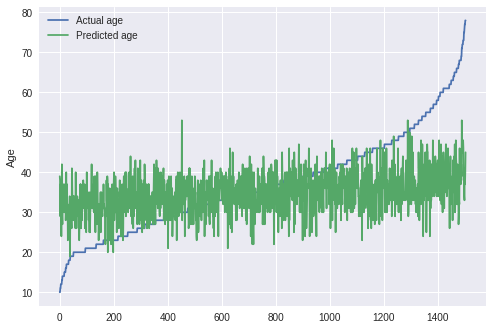

In [41]:
actual_pred_pair_sorted = sorted(actual_pred_pair, key=lambda x: x[0])
plt.plot([x[0] for x in actual_pred_pair_sorted], label="Actual age")
plt.ylabel("Age")
plt.plot([x[1] for x in actual_pred_pair_sorted],label="Predicted age")
plt.legend()
plt.show()